# Apply K-Mean, DBSCAN and Agglomerative on cereal.csv 

1.	Using all of the variables, except name and rating, run the k-means algorithm with k = 5 to identify clusters within the data.
2.	Develop clustering profiles that clearly describe the characteristics of the cereals within the cluster.
3.	Rerun the k-means algorithm with k = 3.
4.	Which clustering solution do you prefer, and why?
5.	Develop clustering profiles that clearly describe the characteristics of the cereals within the cluster.
6.	Use cluster membership to predict rating. One way to do this would be construct a histogram of rating based on cluster membership alone.
7.	Describe how the relationship you uncovered makes sense, based on your earlier profile


[Note: Make sure that the data are normalized.]


In [38]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df_cereal = pd.read_csv('cereal.csv')

In [3]:
df_cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [7]:
# Select duplicate rows except last occurrence based on all columns
duplicateRowsDF = df_cereal[df_cereal.duplicated(keep='last')]
print("Duplicate Rows except last occurrence based on all columns are :")
print(duplicateRowsDF)


Duplicate Rows except last occurrence based on all columns are :
Empty DataFrame
Columns: [name, mfr, type, calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, rating]
Index: []


In [9]:
df_cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.7+ KB


In [10]:
df_cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [13]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df_cereal['name'])
df_cereal['name'] = labelEncoder.transform(df_cereal['name'])


In [14]:
labelEncoder.fit(df_cereal['mfr'])
df_cereal['mfr'] = labelEncoder.transform(df_cereal['mfr'])
labelEncoder.fit(df_cereal['type'])
df_cereal['type'] = labelEncoder.transform(df_cereal['type'])

In [15]:
df_cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null int32
mfr         77 non-null int32
type        77 non-null int32
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int32(3), int64(8)
memory usage: 8.8 KB


In [16]:
df_cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,3,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,1,5,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,2,2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,3,2,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,4,6,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [17]:
print('****************data are normalized**************')
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_cereal)

****************data are normalized**************


In [30]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')

In [33]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
y = kmeans.predict(X_scaled)

In [35]:
y

array([1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 4, 3,
       1, 1, 0, 0, 4, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 3, 2, 1, 0, 4,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 3, 4, 4, 1, 4, 1, 1, 1, 2, 2, 4, 4, 4,
       0, 2, 4, 3, 3, 3, 3, 0, 2, 2, 2])

In [40]:
df_cereal['cluster'] = y

In [51]:
df_cereal.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cluster
72,72,1,0,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,3
73,73,1,0,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,0
74,74,6,0,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,2
75,75,1,0,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,2
76,76,1,0,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559,2


In [52]:
df_cereal[df_cereal['cluster'] == 0]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cluster
5,5,1,0,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541,0
6,6,2,0,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094,0
10,10,5,0,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851,0
12,12,1,0,120,1,3,210,0.0,13.0,9,45,25,2,1.0,0.75,19.823573,0
14,14,1,0,110,1,1,180,0.0,12.0,13,55,25,2,1.0,1.00,22.736446,0
17,17,2,0,110,1,0,90,1.0,13.0,12,20,25,2,1.0,1.00,35.782791,0
18,18,1,0,110,1,1,180,0.0,12.0,13,65,25,2,1.0,1.00,22.396513,0
24,24,2,0,110,2,1,125,1.0,11.0,13,30,25,2,1.0,1.00,32.207582,0
25,25,2,0,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75,31.435973,0
29,29,4,0,110,1,1,135,0.0,13.0,12,25,25,2,1.0,0.75,28.025765,0


ValueError: x and y must be the same size

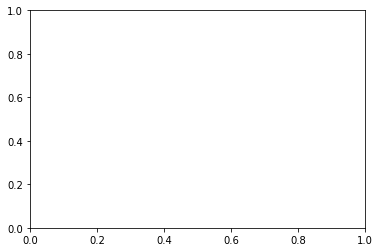

In [54]:
# Visualising the clusters
plt.scatter(df_cereal[df_cereal['cluster'] == 0],df_cereal,c = 'red', label = 'Cluster 1')


In [ ]:
plt.scatter(df_cereal['cluster' == 1],c = 'blue', label = 'Cluster 2')
plt.scatter(df_cereal['cluster' == 2],c = 'green', label = 'Cluster 3')
plt.scatter(df_cereal['cluster' == 3],c = 'cyan', label = 'Cluster 4')
plt.scatter(df_cereal['cluster' == 4],c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()